# Pomegrenate 

Since hidden Markov models are graphical structures, that structure has to be defined. pomegranate allows you to define this structure either through matrices as is common in other packages, or build it up state by state and edge by edge. pomegranate differs from other packages in that it offers both explicit start and end states which you must begin in or end in. Explicit end states give you more control over the model because algorithms require ending there, as opposed to in any state in the model. It also offers silent states, which are states without explicit emission distributions but can be used to significantly simplify the graphical structure.

# A concrete example

Consider two friends, Alice and Bob, who live far apart from each other and who talk together daily over the telephone about what they did that day. Bob is only interested in three activities: walking in the park, shopping, and cleaning his apartment. The choice of what to do is determined exclusively by the weather on a given day. Alice has no definite information about the weather where Bob lives, but she knows general trends. Based on what Bob tells her he did each day, Alice tries to guess what the weather must have been like.

Alice believes that the weather operates as a discrete Markov chain. There are two states, "Rainy" and "Sunny", but she cannot observe them directly, that is, they are hidden from her. On each day, there is a certain chance that Bob will perform one of the following activities, depending on the weather: "walk", "shop", or "clean". Since Bob tells Alice about his activities, those are the observations. The entire system is that of a hidden Markov model (HMM).

Alice knows the general weather trends in the area, and what Bob likes to do on average. In other words, the parameters of the HMM are known. They can be represented as follows in Python:



In [6]:
from pomegranate import *
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/deepak/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Example rainy-sunny HMM using yahmm. Example drawn from the wikipedia HMM
article: http://en.wikipedia.org/wiki/Hidden_Markov_model describing what
Bob likes to do on rainy or sunny days.


In [1]:
import random
import math
%pylab inline
from pomegranate import *
random.seed(0)

Populating the interactive namespace from numpy and matplotlib


/home/deepak/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Initialize Model

In [2]:
# Create a HMM 
model = HiddenMarkovModel()
type(model)

pomegranate.hmm.HiddenMarkovModel

# Emission probabilities


In [3]:
# Specify probabilties of different activities given the hidden state
rainy = State( DiscreteDistribution({ 'walk': 0.1, 'shop': 0.4, 'clean': 0.5 }),name='Rainy' )
sunny = State( DiscreteDistribution({ 'walk': 0.6, 'shop': 0.3, 'clean': 0.1 }),name='Sunny' )

In [4]:
# Look at type of Hidden States
type(rainy)
type(model)

pomegranate.hmm.HiddenMarkovModel

# Initial Distribution

In [5]:
# What is the probabilty of any given day being Sunny or Rainy
model.add_transition( model.start, rainy, 0.6 )
model.add_transition( model.start, sunny, 0.4 )

# Transition matrix
(with 0.05 subtracted from each probability to add to the probability of exiting the hmm)

In [48]:
# The Proabilty of transition of different combinations between Raainy and Sunny
model.add_transition( rainy, rainy, 0.65 )
model.add_transition( rainy, sunny, 0.25 )
model.add_transition( sunny, rainy, 0.35 )
model.add_transition( sunny, sunny, 0.55 )

# Add transitions to the end of the model

In [49]:
# add transition values to the end of the model
model.add_transition( rainy, model.end, 0.1 )
model.add_transition( sunny, model.end, 0.1 )

In [50]:
# Finalize the model structure
model.bake(verbose=True)

In [51]:
# Lets sample from this model.
print (model.sample())

['walk']


In [52]:
len(model.sample())

18


# Lets call Bob every hour and see what he's doing!


In [67]:
# (aka build up a sequence of observations)
sequence = [ 'walk', 'shop', 'clean', 'clean', 'clean', 'walk', 'clean' ]
#sequence = [ 'clean']

# Calculating Probabilities | Sequence

In [68]:
print ("Probability of Sequence: ", \
	math.e**model.forward( sequence )[ len(sequence), model.end_index ])

Probability of Sequence:  1.8545269908e-05


In [69]:
print ("Probability of Cleaning at Time Step 3 Given This Sequence: ",\
       str(math.e**model.forward_backward( sequence )[1][ 3, model.states.index( rainy ) ]))

Probability of Cleaning at Time Step 3 Given This Sequence:  0.936369043759


In [76]:
print ("Probability of the Sequence Given It's Sunny at Time Step 4: ", \
	math.e**model.backward( sequence )[ 4, model.states.index( sunny ) ])

Probability of the Sequence Given It's Sunny at Time Step 4:  0.0014867


In [71]:
model.dense_transition_matrix()

array([[ 0.65,  0.25,  0.  ,  0.1 ],
       [ 0.35,  0.55,  0.  ,  0.1 ],
       [ 0.6 ,  0.4 ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ]])

### Function to plot Graph

In [72]:
def plot_hmm(hmm):
    state_to_label = {s: s.name for i,s in enumerate(hmm.states)}
    nx.draw_networkx(hmm.graph, labels=state_to_label)

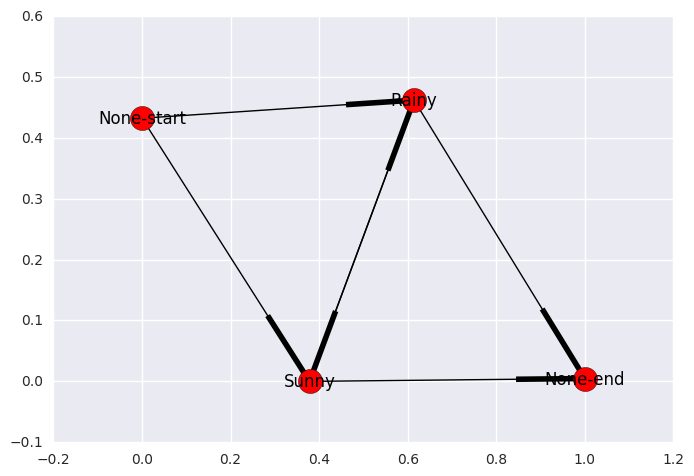

In [74]:
import networkx as x
import seaborn as sns
plot_hmm(model)

In [38]:
model.states

[{
     "distribution" : {
         "parameters" : [
             {
                 "clean" : 0.5,
                 "shop" : 0.4,
                 "walk" : 0.1
             }
         ],
         "frozen" : false,
         "class" : "Distribution",
         "name" : "DiscreteDistribution"
     },
     "weight" : 1.0,
     "class" : "State",
     "name" : "Rainy"
 }, {
     "distribution" : {
         "parameters" : [
             {
                 "clean" : 0.1,
                 "shop" : 0.3,
                 "walk" : 0.6
             }
         ],
         "frozen" : false,
         "class" : "Distribution",
         "name" : "DiscreteDistribution"
     },
     "weight" : 1.0,
     "class" : "State",
     "name" : "Sunny"
 }, {
     "distribution" : null,
     "weight" : 1.0,
     "class" : "State",
     "name" : "None-start"
 }, {
     "distribution" : null,
     "weight" : 1.0,
     "class" : "State",
     "name" : "None-end"
 }]

# Viterbi Algorithm

Consider a village where all villagers are either healthy or have a fever and only the village doctor can determine whether each has a fever. The doctor diagnoses fever by asking patients how they feel. The villagers may only answer that they feel normal, dizzy, or cold.

The doctor believes that the health condition of his patients operate as a discrete Markov chain. There are two states, "Healthy" and "Fever", but the doctor cannot observe them directly; they are hidden from him. On each day, there is a certain chance that the patient will tell the doctor he/she is "normal", "cold", or "dizzy", depending on her health condition.

The observations (normal, cold, dizzy) along with a hidden state (healthy, fever) form a hidden Markov model (HMM), and can be represented as follows in the Python programming language:

The patient visits three days in a row and the doctor discovers that on the first day she feels normal, on the second day she feels cold, on the third day she feels dizzy. The doctor has a question: what is the most likely sequence of health conditions of the patient that would explain these observations? This is answered by the Viterbi algorithm.

# Initial Values

In [77]:
states = ('Healthy', 'Fever')
observations = ('normal', 'cold', 'dizzy')
start_probability = {'Healthy': 0.6, 'Fever': 0.4}

# Probabilities

In [78]:
transition_probability = {
'Healthy' : {'Healthy': 0.7, 'Fever': 0.3},
'Fever' : {'Healthy': 0.4, 'Fever': 0.6}    }

emission_probability = {
    'Healthy' : {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1},
    'Fever' : {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6}
    }


# Viterbi from Scratch

In [92]:
emit_p['Fever'][obs[0]]

0.1

In [94]:
V = [{}]
path = {}
 
start_p=start_probability
emit_p=emission_probability
obs=observations
trans_p=transition_probability
    
for y in states:
    V[0][y] = start_p[y] * emit_p[y][obs[0]]
    path[y] = [y]
 

In [95]:
V

[{'Fever': 0.04000000000000001, 'Healthy': 0.3}]

In [96]:
for t in range(1, len(obs)):
        V.append({})
        newpath = {}
 
        for y in states:
            (prob, state) = max((V[t-1][y0] * trans_p[y0][y] * emit_p[y][obs[t]], y0) for y0 in states)
            V[t][y] = prob
            newpath[y] = path[state] + [y]
 

In [98]:
newpath

{'Fever': ['Healthy', 'Fever'], 'Healthy': ['Healthy', 'Healthy']}

In [97]:
V

[{'Fever': 0.04000000000000001, 'Healthy': 0.3},
 {'Fever': 0.027, 'Healthy': 0.084},
 {'Fever': 0.01512, 'Healthy': 0.00588}]

In [102]:
n=2
max((V[n][y], y) for y in states)

(0.01512, 'Fever')

In [105]:
def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    path = {}
 
    # Initialize base cases (t == 0)
    for y in states:
        V[0][y] = start_p[y] * emit_p[y][obs[0]]
        path[y] = [y]
 
    # Run Viterbi for t > 0
    for t in range(1, len(obs)):
        V.append({})
        newpath = {}
 
        for y in states:
            (prob, state) = max((V[t-1][y0] * trans_p[y0][y] * emit_p[y][obs[t]], y0) for y0 in states)
            V[t][y] = prob
            newpath[y] = path[state] + [y]
 
        # Don't need to remember the old paths
        path = newpath
    n = 0           # if only one element is observed max is sought in the initialization values
    if len(obs) != 1:
        n = t
    print_dptable(V)
    (prob, state) = max((V[n][y], y) for y in states)
    return (prob, path[state])

In [106]:
def print_dptable(V):
    s = "    " + " ".join(("%7d" % i) for i in range(len(V))) + "\n"
    for y in V[0]:
        s += "%.5s: " % y
        s += " ".join("%.7s" % ("%f" % v[y]) for v in V)
        s += "\n"
    print(s)

In [107]:
def example():
    return viterbi(observations,
                   states,
                   start_probability,
                   transition_probability,
                   emission_probability)
print(example())

          0       1       2
Healt: 0.30000 0.08400 0.00588
Fever: 0.04000 0.02700 0.01512

(0.01512, ['Healthy', 'Healthy', 'Fever'])
